1149436199765.8254 test


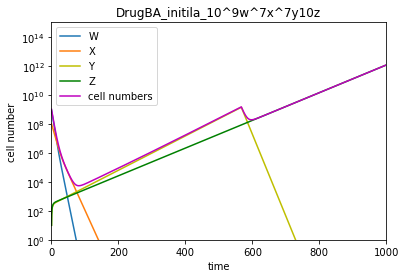

In [1]:
## tiem course with dynamic GR
## drug B frist therapy

#!/usr/bin/python

import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

def dyna(x, t, *arg):
    (qxw, pxw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qxw*(x[1]/(x[0]+α)))/(pxw+(x[1]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

def dynb(x, t, *arg):
    (qyw, pyw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qyw*(x[2]/(x[0]+α)))/(pyw+(x[2]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz]) 


initial_N = 10**9
X = 10**8
Y = 10**1
Z = 10
W = initial_N-X-Y-Z


t_end = 1000
tan = 567
α = 0.00000001

list_t = np.arange(0, tan, 0.01) 
list_t1 = np.arange(tan, t_end, 0.01) 

qxw = 0.08
pxw = 0.0009
pyw = 0.08
qyw = 0.0009
qzw = 0.06
pzw = 0.0009
qzx = 0.07
pzx = 0.0009
qzy = 0.007
pzy = 0.0009

aA = -0.17
bA = 0.008
cA = -0.137

aB = -0.321
bB = -0.187
cB = 0.0203

f = 0.022
g = 0.0000001 
h = 0.0000001 
k = 0.0000001 
p = 0.0000001 
q = 0.0000001

paramsB = (qyw, pyw, qzw, pzw, qzx, pzx, qzy, pzy, aB, bB, cB, f, g, h, k, p, q )
cell_init = (W,X,Y,Z)
cells = odeint(dynb, cell_init, list_t, args = paramsB)
i = len(list_t)-1
cell1_init = [cells[i, 0], cells[i, 1], cells[i, 2], cells[i, 3]]

paramsA = (qxw, pxw, qzw, pzw, qzx, pzx, qzy, pzy, aA, bA, cA, f, g, h, k, p, q )
cell1 = odeint(dyna, cell1_init, list_t1, args = paramsA)

lastone = list()
celltotal = cells[:, 0] + cells[:, 1] + cells[:, 2] + cells[:, 3]
celltotal1 = cell1[:, 0] + cell1[:, 1] + cell1[:, 2] + cell1[:, 3]
lastone = celltotal1[-1]

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.hstack((list_t, list_t1)), np.hstack((cells[:, 0], cell1[:, 0])), label='W')
ax.plot(np.hstack((list_t, list_t1)), np.hstack((cells[:, 1], cell1[:, 1])), label='X')
ax.plot(np.hstack((list_t, list_t1)), np.hstack((cells[:, 2], cell1[:, 2])), 'y', label='Y')
ax.plot(np.hstack((list_t, list_t1)), np.hstack((cells[:, 3], cell1[:, 3])), 'g', label='Z')
ax.plot(np.hstack((list_t, list_t1)), np.hstack((celltotal, celltotal1)), 'm', label='cell numbers')
ax.legend()

ax.set_yscale('log')
ax.set_xlim(0, 1000)
ax.set_ylim(1, 10**15)
ax.set_xlabel('time')
ax.set_ylabel('cell number')
ax.set_title('DrugBA_initila_10^9w^7x^7y10z')

print (lastone, 'test')
plt.show()